In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("NBA_19_records.csv")
df.head()

,Unnamed: 0,rk,player,tm,salary_2019to2020,salary_2020to2021,salary_2021to2022,salary_2022to2023,salary_2023to2024,salary_2024to2025,...,fta,ft_prc,oreb,dreb,reb,ast,tov,stl,blk,plusminus
0,0,1.0,Stephen Curry,GSW,40231758,"$43,006,362","$45,780,966",NaN,NaN,NaN,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,1,2.0,Chris Paul,OKC,38506482,"$41,358,814","$44,211,146",NaN,NaN,NaN,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,2,3.0,Russell Westbrook,HOU,38178000,"$41,006,000","$43,848,000","$46,662,000",NaN,NaN,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,3,4.0,John Wall,WAS,37800000,"$40,824,000","$43,848,000","$46,872,000",NaN,NaN,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,4,5.0,James Harden,HOU,37800000,"$40,824,000","$43,848,000","$46,872,000",NaN,NaN,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6


In [4]:
df = df[['salary_2019to2020','age', 'gp','min','pts','fg_prc','three_pnt_prc','ft_prc','reb','ast', 'tov','plusminus']]
df.head()

,salary_2019to2020,age,gp,min,pts,fg_prc,three_pnt_prc,ft_prc,reb,ast,tov,plusminus
0,40231758,31,69,33.8,27.3,47.2,43.7,91.6,5.3,5.2,2.8,10.0
1,38506482,34,58,32.0,15.6,41.9,35.8,86.2,4.6,8.2,2.6,5.2
2,38178000,30,73,36.0,22.9,42.8,29.0,65.6,11.1,10.7,4.5,4.0
3,37800000,28,32,34.5,20.7,44.4,30.2,69.7,3.6,8.7,3.8,-4.8
4,37800000,29,78,36.8,36.1,44.2,36.8,87.9,6.6,7.5,5.0,4.6


In [5]:
df = df.rename(columns={"salary_2019to2020":"y","age":"X1", "gp":"X2","min":"X3","pts":"X4","fg_prc":"X5","three_pnt_prc":"X6","ft_prc":"X7","reb":"X8","ast":"X9", "tov":"X10","plusminus":"X11"})
df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,40231758,31,69,33.8,27.3,47.2,43.7,91.6,5.3,5.2,2.8,10.0
1,38506482,34,58,32.0,15.6,41.9,35.8,86.2,4.6,8.2,2.6,5.2
2,38178000,30,73,36.0,22.9,42.8,29.0,65.6,11.1,10.7,4.5,4.0
3,37800000,28,32,34.5,20.7,44.4,30.2,69.7,3.6,8.7,3.8,-4.8
4,37800000,29,78,36.8,36.1,44.2,36.8,87.9,6.6,7.5,5.0,4.6


In [6]:
new_df = df[['y', 'X1', 'X4', 'X8', 'X9', 'X11']]
new_df

,y,X1,X4,X8,X9,X11
0,40231758,31,27.3,5.3,5.2,10.0
1,38506482,34,15.6,4.6,8.2,5.2
2,38178000,30,22.9,11.1,10.7,4.0
3,37800000,28,20.7,3.6,8.7,-4.8
4,37800000,29,36.1,6.6,7.5,4.6
...,...,...,...,...,...,...
290,1588231,26,4.7,3.4,0.4,0.2
291,1000000,29,6.5,2.3,2.3,-2.6
292,666667,33,4.0,1.8,1.8,0.7
293,122741,24,5.3,2.8,0.5,-3.2


In [7]:
print(new_df.max())
print(new_df.min())

y      40231758.0
X1           42.0
X4           36.1
X8           15.6
X9           10.7
X11          10.0
dtype: float64
y      92857.0
X1        20.0
X4         0.0
X8         0.0
X9         0.0
X11       -8.4
dtype: float64


In [8]:
# Create the bins in which Data will be held
# Bins = [90K-5M, 6M-10M, 11M-15M, 16M-20M, 21M-25M, 26M-30M, 31M-35M, 36M-40M, 41M-45M]
bins = [90000, 5000000, 10000000, 15000000, 20000000,25000000,30000000,35000000, 40000000, 45999999]

# Create the names for the four bins
group_names = ["90K-5M", "6M-10M", "11M-15M", "16M-20M", "21M-25M", "26M-30M", "31M-35M", "36M-40M", "40M-45M"]

print(len (bins))
print(len(group_names))

10
9


In [9]:
new_df["Salary_Range"] = pd.cut(new_df["y"], bins, labels=group_names)
new_df

C:\Users\melis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,y,X1,X4,X8,X9,X11,Salary_Range
0,40231758,31,27.3,5.3,5.2,10.0,40M-45M
1,38506482,34,15.6,4.6,8.2,5.2,36M-40M
2,38178000,30,22.9,11.1,10.7,4.0,36M-40M
3,37800000,28,20.7,3.6,8.7,-4.8,36M-40M
4,37800000,29,36.1,6.6,7.5,4.6,36M-40M
...,...,...,...,...,...,...,...
290,1588231,26,4.7,3.4,0.4,0.2,90K-5M
291,1000000,29,6.5,2.3,2.3,-2.6,90K-5M
292,666667,33,4.0,1.8,1.8,0.7,90K-5M
293,122741,24,5.3,2.8,0.5,-3.2,90K-5M


In [15]:
X = new_df.drop(columns=['y', 'Salary_Range'])
y = new_df['y']

In [16]:
print(X.shape, y.shape)
X.shape

(295, 5) (295,)


(295, 5)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
model = LinearRegression(normalize=False)

In [19]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5750174983280251
Testing Score: 0.6386285703232046


In [20]:
model.coef_

array([ 466525.93317162,  755425.24357726,  535291.40920341,
       1012311.63360438,  302084.19959373])

Text(0.5, 1.0, 'Residual Plot')

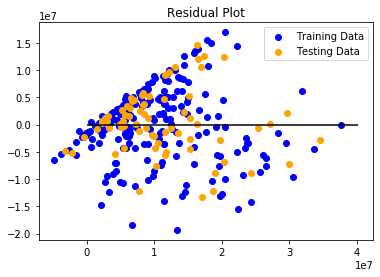

In [21]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [22]:
model.predict(np.array([34,10.8,6.5,1.2,-1.2]).reshape(1, -1))

array([12762422.14836008])